In [6]:
import numpy as np

In [107]:
class LogisticRegressionClassifier:
    
    def __init__(self, learning_rate = 0.1, tol = 1e-4, n_iter = 600, penalty =  'l2', C=0.1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        #‘l1’, ‘l2’, ‘elasticnet’, ‘none’
        self.penalty = penalty
        self.C = C
        self.tol = tol
    
    def normalization(self, X):
        
        n_sample = X.shape[0]
        mean = np.mean(X,axis=0,dtype=np.float64)
        var = np.var(X,axis=0,dtype=np.float64)
        return (X-mean)/(np.sqrt(var))
        
    def _sigmoid(self, Z):

        return 1/(1+np.exp(-Z)) 
    
    def cost(self, Z, y):
        
        n_sample = Z.shape[0]
        
        if self.penalty == 'l2':
            return( -1/n_sample * self.C * np.sum((y * np.log(self._sigmoid(Z)+1e-8)) + ((1 - y) * np.log(1 - self._sigmoid(Z)+1e-8))) + 1/(2*n_sample)*np.sum(self.w**2))
        elif self.penalty == None:
            return( -1/n_sample * np.sum((y * np.log(self._sigmoid(Z)+1e-8)) + ((1 - y) * np.log(1 - self._sigmoid(Z)+1e-8))))
    
    def fit(self, X, y, normalization = True):
        """
        Fit method for training data.
        
        Parameters:
        -----------------------
        X_train: {array-like}, shape = [n_samples, n_features]
            Training matrix, where 'n_samples' is the number of samples 
            and 'n_features' is the number of features
        y_train: {array-like}, shape = [n_samples]
            Target labels
        
        Attributes:
        -----------------------
        d_record_: list
            Record all distance.
        error_rate_: list
            Record all missclassification rate.  
        
        Returns:
        ------------------------
        self: object
        """
        # Initilize a lst to record costs
        self._costs = []
    
        #add a 1 in each row(intercept) into X
        X = np.insert(X,0,1,axis=1)
        n_sample, n_feature = X.shape
        
        # initialize w
        self.w = np.ones(n_feature)
        
        
        # find optimal w
        for count in range(self.n_iter):
            
            Z = np.dot(X,self.w)
            errors = self._sigmoid(Z)-y
            self.cost(Z,y)
            self._costs.append(self.cost(Z,y))

            if self.cost(Z,y) <= self.tol:
                print('stop at iteration {}'.format(count))
                break

            if self.penalty == 'l2':
                gradient = 1/n_sample * (self.C*np.dot(X.T,errors) + (self.w))
            elif self.penalty == 'l1':
                pass
            elif self.penalty == 'elasticnet':
                pass
            elif self.penalty == None:
                gradient = 1/n_sample * np.dot(X.T,errors)
                
            self.w -= self.learning_rate * gradient
            
        
    def predict(self, X):
                
        #add a 1 in each row(intercept) into X
        X = np.insert(X,0,1,axis=1)
        Z = np.dot(X,self.w)
        return np.where(self._sigmoid(Z)>=0.5,1,0)
    
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)
        
        

        

In [108]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

cancer=datasets.load_breast_cancer()
X=cancer.data
y=cancer.target

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log = LogisticRegressionClassifier(penalty =  'l2')
log.fit(X_train, y_train)
y_pred=log.predict(X_test)

/Users/qijin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


In [109]:
log.w

array([  1.17732671,   3.27368555,   4.82968239,  15.18087092,
        10.83529951,   0.89159815,   0.86702209,   0.83859832,
         0.85453578,   0.91164679,   0.88673545,   0.86710607,
         1.14842633,   0.7804993 ,  -6.45703349,   0.87030468,
         0.86935899,   0.86851537,   0.86912146,   0.87324422,
         0.86922799,   3.32979258,   5.91626446,  15.08519746,
       -12.3767242 ,   0.89828136,   0.85259822,   0.81509804,
         0.85567989,   0.93091754,   0.88732989])

In [110]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        53
           1       0.91      0.96      0.93        90

    accuracy                           0.92       143
   macro avg       0.92      0.90      0.91       143
weighted avg       0.92      0.92      0.92       143



array([[45,  8],
       [ 4, 86]])

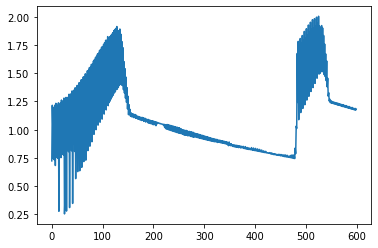

In [111]:
import matplotlib.pyplot as plt
plt.plot(log._costs)

In [115]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

/Users/qijin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [116]:
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.98      0.93      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



array([[51,  2],
       [ 6, 84]])